## <span style="color:Darkred"> Gault, Sorel, Plattsburgh Sounding Converter </span>
---

#### <span style="color:Darkred"> Input File Information Here! </span>

In [25]:
# SOUNDING CSV FILE GOES HERE!
file = '/home11/ugrad/2020/je845911/research/data/upperair.sounding.202202180500.Albany_DOW-US_Plattsburgh.csv'

# DATE / TIME INFORMATION FROM FILENAME GOES HERE
YYYY = '2022'
MM = '02'
DD = '18'
HH = '05'
KK = '00'

# LOCATION @ WHICH RAOB LAUNCH OCCURED 
Site = 'DOW-US-Plattsburgh'#UQAM-Sorel'

#### <span style="color:Darkred"> Run This Cell After Inputing File Information </span>

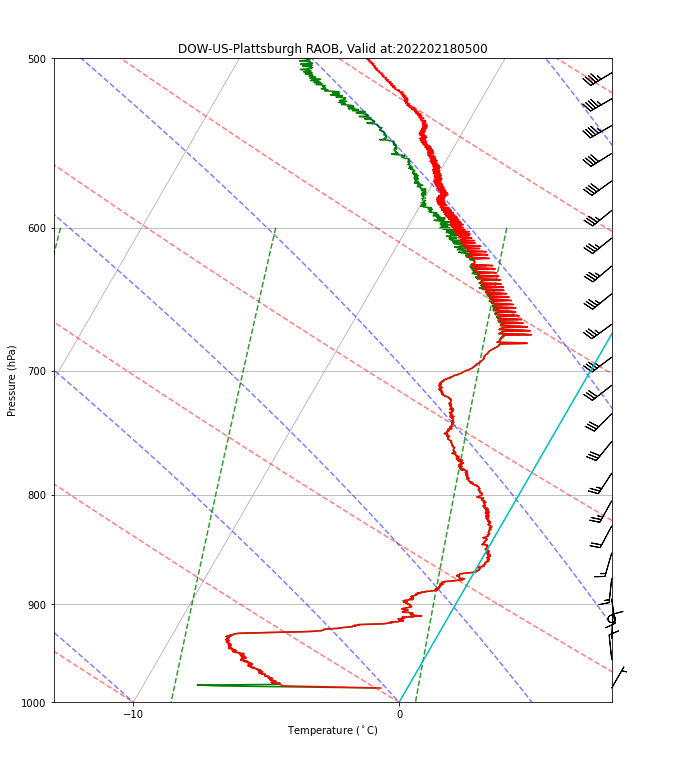

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import metpy.calc as mpcalc
from metpy.calc import wind_components
from metpy.plots import Hodograph, SkewT
from metpy.units import units
from datetime import datetime, timedelta
import pandas as pd

df = pd.read_csv(file, quotechar="'")
df = df.drop([0,1])
n = 0
df.drop(df.tail(n).index,
        inplace = True)
df

df.drop_duplicates(inplace=True,subset='Press',ignore_index=True)
p = df['Press'].values.astype(float) * units.hPa  # Now numbers with units also attached. [ * units.hPa also works]
a = df['Temp'].values.astype(float)
b = df['RelHum'].values.astype(float)
Td = a - ((100 - b)/5)
T = df['Temp'].values.astype(float) * units.degC
D = Td * units.degC
Speed = df['WSpeed'].values.astype(float)*units.knots
Direction = df['WDirn'].values.astype(float)*units.degrees
u,v = mpcalc.wind_components(Speed, Direction)

#################################################################################

# Uncoment Code Below to try to plot the Parcel Path, often sounding pressure levels are not,
# decreasing with height, thereforethis variable will not plot.

#parcel_path = mpcalc.parcel_profile(p, T[0], D[0])

# IF THIS PLOT WITHOUT ERROR THEN UNEDIT THE CODE 
# BETWEEN "BLUE LINES" AT THE BOTTOM OF THIS CELL

#################################################################################
# Figure
fig = plt.figure(figsize=(10,30))
skew = SkewT(fig, rotation=30)

# Title
plt.title(Site + " RAOB, Valid at:" + YYYY +MM+DD+HH+KK)

# Skew - T Lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

idx = 50

#Limits
skew.ax.set_xlim(-13,8)  
skew.ax.set_ylim(1000,500)

# Profiles
skew.plot(p, T, 'red',zorder =2)
skew.plot(p, D, 'green', zorder =1)
#skew.plot(p, parcel_path, color='k')

#Winds
mask = p >= 500 * units.hPa
skew.plot_barbs(p[mask][::idx], u[mask][::idx],v[mask][::idx])  

# Labels
plt.xlabel("Temperature ($^\circ$C)")
plt.ylabel("Pressure (hPa)")

# 500hPa Line and 0C Line
#skew.ax.axhline(500 * units.hPa, color='k')
skew.ax.axvline(0 * units.degC, color='c') 

# LFC, EL Pressure Level Line
#skew.ax.axhline(lfc_p)
#skew.ax.axhline(el_p)

#################################################################################

#skew.plot(p, parcel_path, color='k')

#################################################################################

#plt.savefig(Site+"_"+YYYY+MM+DD+HH+KK)

England, John | 05/30/2022